In [52]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier, LogisticRegression, DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
from pyspark.sql import functions as F

# Inisialisasi Spark Session
spark = SparkSession.builder.appName("ModelComparison").getOrCreate()

# Membaca dataset
data = spark.read.csv("/content/top2020.csv", header=True, inferSchema=True)

# Memilih kolom yang relevan
data = data.select("Nilai_Total", "Ranking", "Provinsi", "Jenis")

# Mengkodekan kolom kategori
indexer = StringIndexer(inputCol="Jenis", outputCol="label")
data = indexer.fit(data).transform(data)

# Menggabungkan fitur menjadi satu kolom
assembler = VectorAssembler(inputCols=["Nilai_Total"], outputCol="features")
data = assembler.transform(data)
data = data.withColumn("label", F.when(data["label"] > 1, 1).otherwise(0))
# Membagi data menjadi set pelatihan dan pengujian
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Model 1: Random Forest
rf = RandomForestClassifier(labelCol="label", featuresCol="features")
rf_model = rf.fit(train_data)
rf_predictions = rf_model.transform(test_data)

# Model 2: Gradient Boosted Trees
gbt = GBTClassifier(labelCol="label", featuresCol="features")
gbt_model = gbt.fit(train_data)
gbt_predictions = gbt_model.transform(test_data)

# Model 3: Logistic Regression
lr = LogisticRegression(labelCol="label", featuresCol="features")
lr_model = lr.fit(train_data)
lr_predictions = lr_model.transform(test_data)

# Model 4: Decision Tree
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)

# Evaluasi Model
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

# Menghitung Akurasi
rf_accuracy = evaluator.evaluate(rf_predictions)
gbt_accuracy = evaluator.evaluate(gbt_predictions)
lr_accuracy = evaluator.evaluate(lr_predictions)
dt_accuracy = evaluator.evaluate(dt_predictions)

# Menampilkan hasil
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Gradient Boosted Trees Accuracy: {gbt_accuracy}")
print(f"Logistic Regression Accuracy: {lr_accuracy}")
print(f"Decision Tree Accuracy: {dt_accuracy}")


Random Forest Accuracy: 0.9629629629629629
Gradient Boosted Trees Accuracy: 0.9629629629629629
Logistic Regression Accuracy: 0.9629629629629629
Decision Tree Accuracy: 0.9629629629629629


In [53]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Evaluasi Model untuk AUC, Akurasi, F1 Score, Precision, dan Recall

# Evaluator untuk metrik klasifikasi biner (untuk AUC)
binary_evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="prediction")

# Menghitung AUC (Area Under ROC)
rf_auc = binary_evaluator.evaluate(rf_predictions, {binary_evaluator.metricName: "areaUnderROC"})
gbt_auc = binary_evaluator.evaluate(gbt_predictions, {binary_evaluator.metricName: "areaUnderROC"})
lr_auc = binary_evaluator.evaluate(lr_predictions, {binary_evaluator.metricName: "areaUnderROC"})
dt_auc = binary_evaluator.evaluate(dt_predictions, {binary_evaluator.metricName: "areaUnderROC"})

# Evaluator untuk metrik klasifikasi multikelas (untuk akurasi, F1, precision, recall)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

# Akurasi
rf_accuracy = evaluator.evaluate(rf_predictions, {evaluator.metricName: "accuracy"})
gbt_accuracy = evaluator.evaluate(gbt_predictions, {evaluator.metricName: "accuracy"})
lr_accuracy = evaluator.evaluate(lr_predictions, {evaluator.metricName: "accuracy"})
dt_accuracy = evaluator.evaluate(dt_predictions, {evaluator.metricName: "accuracy"})

# F1 Score
rf_f1 = evaluator.evaluate(rf_predictions, {evaluator.metricName: "f1"})
gbt_f1 = evaluator.evaluate(gbt_predictions, {evaluator.metricName: "f1"})
lr_f1 = evaluator.evaluate(lr_predictions, {evaluator.metricName: "f1"})
dt_f1 = evaluator.evaluate(dt_predictions, {evaluator.metricName: "f1"})

# Precision
rf_precision = evaluator.evaluate(rf_predictions, {evaluator.metricName: "weightedPrecision"})
gbt_precision = evaluator.evaluate(gbt_predictions, {evaluator.metricName: "weightedPrecision"})
lr_precision = evaluator.evaluate(lr_predictions, {evaluator.metricName: "weightedPrecision"})
dt_precision = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedPrecision"})

# Recall
rf_recall = evaluator.evaluate(rf_predictions, {evaluator.metricName: "weightedRecall"})
gbt_recall = evaluator.evaluate(gbt_predictions, {evaluator.metricName: "weightedRecall"})
lr_recall = evaluator.evaluate(lr_predictions, {evaluator.metricName: "weightedRecall"})
dt_recall = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedRecall"})

# Menampilkan hasil
print(f"Random Forest Accuracy: {rf_accuracy}, AUC: {rf_auc}, F1: {rf_f1}, Precision: {rf_precision}, Recall: {rf_recall}")
print(f"Gradient Boosted Trees Accuracy: {gbt_accuracy}, AUC: {gbt_auc}, F1: {gbt_f1}, Precision: {gbt_precision}, Recall: {gbt_recall}")
print(f"Logistic Regression Accuracy: {lr_accuracy}, AUC: {lr_auc}, F1: {lr_f1}, Precision: {lr_precision}, Recall: {lr_recall}")
print(f"Decision Tree Accuracy: {dt_accuracy}, AUC: {dt_auc}, F1: {dt_f1}, Precision: {dt_precision}, Recall: {dt_recall}")


Random Forest Accuracy: 0.9629629629629629, AUC: 0.5, F1: 0.9447938504542277, Precision: 0.9272976680384086, Recall: 0.9629629629629629
Gradient Boosted Trees Accuracy: 0.9629629629629629, AUC: 0.5, F1: 0.9447938504542277, Precision: 0.9272976680384086, Recall: 0.9629629629629629
Logistic Regression Accuracy: 0.9629629629629629, AUC: 0.5, F1: 0.9447938504542277, Precision: 0.9272976680384086, Recall: 0.9629629629629629
Decision Tree Accuracy: 0.9629629629629629, AUC: 0.5, F1: 0.9447938504542277, Precision: 0.9272976680384086, Recall: 0.9629629629629629


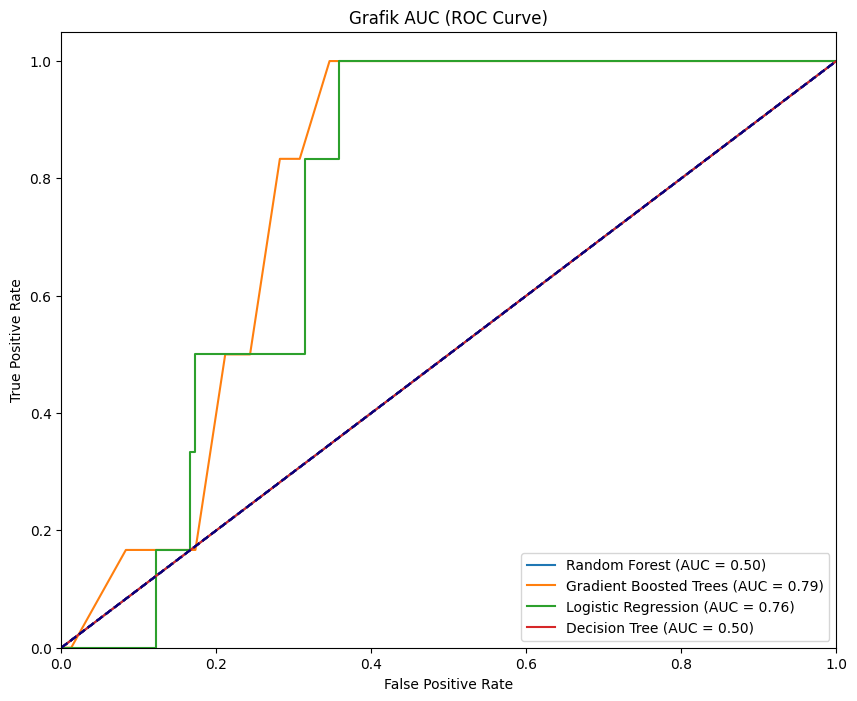

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Fungsi untuk plot ROC curve
def plot_roc_curve(fpr, tpr, auc_score, model_name):
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Grafik AUC (ROC Curve)')
    plt.legend(loc='lower right')

# Ambil probabilitas dari model Spark untuk ROC curve
def get_roc_data(model_predictions):
    # Mengambil probabilitas dan label asli
    probs = model_predictions.select("probability").rdd.map(lambda row: row[0][1]).collect()
    labels = model_predictions.select("label").rdd.map(lambda row: row[0]).collect()

    # Menghitung ROC curve
    fpr, tpr, _ = roc_curve(labels, probs)
    roc_auc = auc(fpr, tpr)

    return fpr, tpr, roc_auc

# Menghitung dan menggambar ROC curve untuk masing-masing model
rf_fpr, rf_tpr, rf_auc = get_roc_data(rf_predictions)
gbt_fpr, gbt_tpr, gbt_auc = get_roc_data(gbt_predictions)
lr_fpr, lr_tpr, lr_auc = get_roc_data(lr_predictions)
dt_fpr, dt_tpr, dt_auc = get_roc_data(dt_predictions)

# Plot ROC Curve
plt.figure(figsize=(10, 8))

plot_roc_curve(rf_fpr, rf_tpr, rf_auc, "Random Forest")
plot_roc_curve(gbt_fpr, gbt_tpr, gbt_auc, "Gradient Boosted Trees")
plot_roc_curve(lr_fpr, lr_tpr, lr_auc, "Logistic Regression")
plot_roc_curve(dt_fpr, dt_tpr, dt_auc, "Decision Tree")

# Tampilkan grafik ROC
plt.show()

# Menghentikan Spark Session
spark.stop()
